# Fisher matrix

The `cobaya_utilities` also provides a simple interface to compute the Fisher matrix for likelihood derivated from [MFLike](https://github.com/simonsobs/LAT_MFLike). In this tutorial, we will generate forecast for the Simons Observatory Large Aperture Telescope. We start by installing the likelihood

In [1]:
%pip install mflike

Note: you may need to restart the kernel to use updated packages.


For the purpose of this tutorial, we also need a Boltzmann solver

In [2]:
%pip install camb

Note: you may need to restart the kernel to use updated packages.


We set a fiducial cosmology and the nuisance parameters for `LAT_MFLike` likelihood

In [3]:
cosmo_params = {
    "cosmomc_theta": 0.0104085,
    "logA": 3.044,
    "ombh2": 0.02237,
    "omch2": 0.1200,
    "ns": 0.9649,
    "tau": 0.0544,
}

nuisance_params = {
    "a_tSZ": 3.30,
    "a_kSZ": 1.60,
    "a_p": 6.90,
    "beta_p": 2.08,
    "a_c": 4.90,
    "beta_c": 2.20,
    "a_s": 3.10,
    "a_gtt": 8.70,
    "a_gte": 0.0,
    "a_gee": 0.0,
    "a_psee": 0.0,
    "a_pste": 0.0,
    "xi": 0.10,
    "T_d": 9.60,
}

all_params = {**cosmo_params, **nuisance_params}

Given this set of parameters, we can now ask `cobaya_utilities` to compute the associated Fisher matrix. If the likelihood data are not installed, the function will install them in a temporary directory. You can also export the `COBAYA_PACKAGES_PATH` to point to your `cobaya` package directory

In [5]:
from cobaya_utilities import fisher

default_likelihood_config = {
    "input_file": "LAT_simu_sacc_00000.fits",
    "cov_Bbl_file": "data_sacc_w_covar_and_Bbl.fits",
}
summary = fisher.compute_fisher_matrix("mflike.MFLike", default_likelihood_config, all_params)

[install] Installing external packages at '/tmp/cobaya_utilities'
[install] The installation path has been written into the global config file: /home/garrido/.config/cobaya/config.yaml

likelihood:mflike.MFLike

[install] Checking if dependencies have already been installed...
[install] External dependencies for this component already installed.
[install] Doing nothing.

* Summary * 

[install] All requested components' dependencies correctly installed at /tmp/cobaya_utilities
[camb] `camb` module loaded successfully from /home/garrido/Workdir/development/cobaya_utilities/pyenv/lib/python3.11/site-packages/camb
[mflike.mflike] Number of bins used: 3087
[mflike.mflike] Initialized!
[mflike.mflike] Computing bandpass at first step, no shifts
[fisher] Computing parameter 'cosmomc_theta' done
[fisher] Computing parameter 'logA' done
[fisher] Computing parameter 'ombh2' done
[fisher] Computing parameter 'omch2' done
[fisher] Computing parameter 'ns' done
[fisher] Computing parameter 'tau' d

The `summary` return variable is a `pandas DataFrame` with the associated $\sigma$ and the Signal over Noise ratio. We can sort the results from the greater to the lowest S/N values

In [6]:
summary.drop(columns="param").sort_values(by="S/N", ascending=False)

,value,$\sigma$,S/N
$\theta_\mathrm{MC}$,0.010408,0.000001,7407.203363
$\Omega_\mathrm{b}h^2$,0.022370,0.000063,354.530792
$n_\mathrm{s}$,0.964900,0.003190,302.431681
$a_s$,3.100000,0.011212,276.478646
$\log(10^{10} A_\mathrm{s})$,3.044000,0.018571,163.908510
$a_p$,6.900000,0.049758,138.670025
$\Omega_\mathrm{c}h^2$,0.120000,0.001103,108.822517
$a_\mathrm{tSZ}$,3.300000,0.069043,47.796453
$a_\mathrm{dust}^\mathrm{TT}$,8.700000,0.213625,40.725648
$a_c$,4.900000,0.196043,24.994468


We can also represent the correlation matrix between parameters

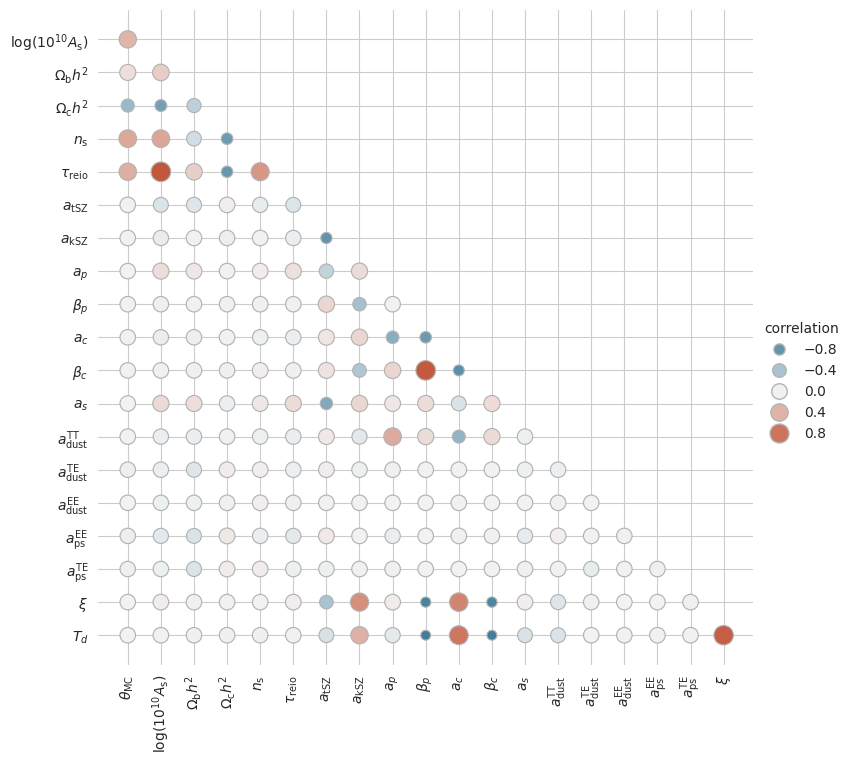

In [7]:
fisher.plot_fisher_matrix();